<h1>Анализ рынка заведений общественного питания Москвы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1">Введение</a></span></li><li><span><a href="#Ознакомление-и-подготовка-данных" data-toc-modified-id="Ознакомление-и-подготовка-данных-2">Ознакомление и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#Соотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Соотношение-видов-объектов-общественного-питания-по-количеству-3">Соотношение видов объектов общественного питания по количеству</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1">Вывод</a></span></li></ul></li><li><span><a href="#Cоотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Cоотношение-сетевых-и-несетевых-заведений-по-количеству-4">Cоотношение сетевых и несетевых заведений по количеству</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-видов-объектов-общественного-питания-по-принадлежности-к-сети" data-toc-modified-id="Анализ-видов-объектов-общественного-питания-по-принадлежности-к-сети-5">Анализ видов объектов общественного питания по принадлежности к сети</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-сетевых-заведений-по-числу-посадочных-мест" data-toc-modified-id="Анализ-сетевых-заведений-по-числу-посадочных-мест-6">Анализ сетевых заведений по числу посадочных мест</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-среднего-количества-посадочных-мест" data-toc-modified-id="Анализ-среднего-количества-посадочных-мест-7">Анализ среднего количества посадочных мест</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-размещения-объектов-общественного-питания" data-toc-modified-id="Анализ-размещения-объектов-общественного-питания-8">Анализ размещения объектов общественного питания</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.1">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания" data-toc-modified-id="Анализ-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания-9">Анализ количества посадочных мест для улиц с большим количеством объектов общественного питания</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-9.1">Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-10">Общий вывод</a></span></li></ul></div>

## Введение

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?  
Необходимо подготовить исследование рынка. Есть открытые данные о заведениях общественного питания в Москве.

Таблица rest_data:  
id — идентификатор объекта;  
object_name — название объекта общественного питания;  
chain — сетевой ресторан;  
object_type — тип объекта общественного питания;  
address — адрес;  
number — количество посадочных мест.  

## Ознакомление и подготовка данных

In [2]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import re
import requests
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import string
import matplotlib.patches as mpatches
from io import BytesIO

In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)

In [3]:
'''
Функция поиска всех слов в списке по основному слову
'''
def find_synonymous(name):
    list_synonymous = []
    for i in rest_data['object_name_corr'].unique():
        if name in i:
            list_synonymous.append(i)
    return list_synonymous            

In [4]:
'''
Функция, заменяющая наименование заведения на общее наименование сети заведений
'''
def check_synonymous(cell):
    for name, syn  in dict_syn.items():
        if cell in syn:
            return name
    return cell

In [5]:
sns.set_palette('dark') 

In [6]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [7]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [8]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [9]:
print('Наличие дубликатов: {}'.format(rest_data.duplicated().sum()))

Наличие дубликатов: 0


Полных дубликатов в датасете нет. Предобработка не требуется.

In [10]:
len(rest_data['id'].unique())

15366

ID уникальны.

Проведем обработку наименований заведений - приведем слова к нижнему регистру, удалим знаки пунктуации.

In [11]:
rest_data['object_name_corr'] = rest_data['object_name'].str.lower()

In [12]:
punctuations = list(string.punctuation)
punctuations_add = ['«',  '»', '№']
punctuations.extend(punctuations_add)

In [13]:
for p in punctuations:
    rest_data['object_name_corr'] = rest_data['object_name_corr'].str.replace(p, ' ')

In [14]:
rest_data.head()

,id,object_name,chain,object_type,address,number,object_name_corr
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель


Для заведений, входящих в одну сеть, заменим частные наименования на имя сети. Сформируем список с наименованием сети И сохраним его в chain_name.

In [15]:
# rest_data_chain = rest_data.query('chain == "да"')

In [16]:
# rest_data_chain['object_name_corr'].sort_values().unique()

In [17]:
chain_name = ['beverly hills diner', 'bierloga', 'black   white', 'bocconcino',
       'boobo', 'bubbleology', 'burger club', 'coffeeshop',
       'cofix', 'cookhouse', 'correas',
       'costa coffee', 'deli by prime прайм кафе', 'dunkin donuts',
       'florentini', 'fridays', 'glowsubs sandwiches',
       'grand cru', 'grand урюк', 'healthy food',
       'il forno иль форно', 'jeffreys coffee', 'kfc',
       'krispy creme', 'lavkalavka',
       'luciano', 'm cafe хинкальная', 'maki maki', 'marmalato',
       'marrakesh хинкальная', 'moskalyan', 'movenpick', 'my box',
       'osteria mario', 'panda express', 'paul поль', 'pizengof99 спб',
       'starbucks',
       'starlite diner', 'subway', 'sushilka',
       'tajj mahal', 'tgi fridays', 'the terrace', 'tokyo bay',
       'торро гриль', 'travelers coffe', 
       'tutti frutti', 'upside down',
       'ванвок',
       'вьеткафе', 'white rabbite', 'wok box',
       'wokker', 'yogurt frenzy', 'азбука вкуса',
       'алло пицца', 
       'американ сити пицца', 'андерсон',
       'анти кафе кальянная  moskalyan ', 'ариана', 'бабай клаб',
       'бакинский бульвар', 'бар  буфет  николай ', 'бар  суши wok ',
       'мята lounge', 'баракат', 'барашка', 'барбарис', 'барбекю',
       'баскин роббинс', 'бб энд бургерс', 'бенто wok',
       'билла', 'бир хаус', 'блинная',
       'бодрый день кофе с собой', 'ботик петра', 'брава коста кофе',
       'братья караваевы', 'брудер', 'брусника','бургер кинг', 'бургер клаб',
       'бутчер бизон', 'в в бургер', 'чайхона  1',
       'ваби саби', 'ванвок', 'вареничная  1', 'васаби', 'урюк',
       'венеция', 'виват пицца', 'виктория', 'вкусняшка', 'воккер',
       'волконский', 'восточный базар', 'вьеткафе', 'газпромнефтьцентр',
       'гамбринус', 'ганс и марта', 'генацвали', 'гино но таки',
       'городские автокофейни', 'готика', 'готовые блюда милти', 'грабли',
       'граци рагацци зю кафе', 'грузинская кухня эzо хинкальная',
       'грузинские каникулы барбарис', 'гудман', 
       'гурман', 'гурмания', 'да пино', 'дабл би',
       'данкин донатс', 'две палочки', 'де марко',
       'андерсон',
       'космик ', 'джаганнат', 'джон джоли',
       'добрынинский и партнёры', 'додо пицца',
       'домашнее кафе сеть городских кафе', 'домино с пицца',
       'дорогая я перезвоню', 'дюшес',
       'елки палки', 'жан жак', 
       'зодиак', 'золотая вобла', 'зю кафе', 'изба', 'икура паб',
       'иль патио', 'иль форно', 'илья муромец',
       'ирландский паб', 'ичибан боши', 'кактус',
       'кальян бар moskalyan', 
       'кальянная f lounge', 'каро', 'кулинарная лавка братьев караваевых',           
       'марукамэ ',       
       'поль бейкери ', 
       'кафе  сим сим ',        
       'кафе  тапчан ',
       'кафе  торнадо ',
       'кафе  урюк  хивинская чайхона', 'кафе  хинкальная ',      
       'кафе мороженного  tutti frutti ', 
       'кафе пекарня хачапури',
       'кафе песто и митлес', 'bp ',
       'газпромнефть', 'лукойл', 'кафе пронто',
       'кафе рецептор', 
       'каффе  wokker ', 'квартира 44', 'кебаб хаус', 'колбасофф',       
       'корчма тарас бульба', 'космик', 'коста кофе', 'кофе бин',       
       'кофе тун', 'кофе хаус','кофейня  де марко ', 
       'кофемания', 
       'кофепорт', 'кофетун', 'кофешоп coffeeshop company',
       'крепери де пари', 'крошка картошка', 'кружка',   
       'кулинарное бюро', 'лепешка',
       'лето', 'ливан хаус', 'лукойл', 
       'магазин готовой еды  милти ', 'магазин кулинария  суши сет ',
       'магбургер', 'магнолия',
       'макдоналдс', 
       'маки маки', 'макс бреннер', 'марчеллис', 'меленка',
       'менза', 'метро к к', 'ми пьяче', 'милано пицца', 'милти',
       'мимино', 'мимино хинкальная', 'мираторг', 'мистер картошка',
       'молли гвинз', 
       'мск московская сеть кальянных',       
       'му му', 'мюнгер',
       'мясоroob', 'николай',
       'нияма', 'ньокки',
       'обжорный ряд', 'оникс', 'паб кружка', 'павлин мавлин',
       'панчо пицца', 'папа джонс',
       'перекресток', 'пивко', 'пикколо', 'пилзнер',
       'пиппони', 'штолле', 'пицца  паоло ', 'пицца pomodoro',
       'пицца пипони', 'пицца фабрика',
       'пицца хат', 'пицца экспресс', 'пиццерия  академия ',       
       'пиццерия  пицца паоло ',
       'пиццерия донателло',
       'пиццерия пиу дель чибо', 'пиццетория',
       'планета суши', 'поль бейкери', 'помидорbrt',
       'порто мальтезе', 'правdа кофе',
       'пражечка', 
       'прайм стар',        
       'примавера',
       'пронто', 'простые вещи', 'ресторан  florentini ',         
       'ресторан  джардино да пино ', 
       'ресторан  золотая вобла ',  
       'ресторан  хинкальная ', 
       'икеа',
       'рецептор', 'роллофф',
       'роснефть', 'руккола', 'сабвей', 'сбарро', 'сварня',        
       'сити пицца', 'сказка', 'советские времена',
       'спб', 
       'старбакс', 'стардогs',
       'старина миллер',
       'сувлаки',
       'суп кафе', 'суши wok', 
       'суши вок', 'суши сет', 'суши тун',
       'сушиман', 'сушишоп',
       'сытая утка', 'тайм авеню', 'тамаси суши', 'тануки', 'тапчан',
       'ташир пицца', 'темпл бар', 'теремок', 
       'территория', 
       'тирольские пироги', 'то да сё', 'торро гриль',
       'точка продажи готовой еды милти', 'тратория semplice',
       'траттория примавера', 'урожай', 'урюк', 
       'фантоцци рус', 'фитнес бар  world class ', 'французская выпечка',
       'хачапури  одесса  мама', 'хижина', 'хлеб co',
       'хлеб насущный', 'хлебница пекарня', 'цинандали хинкальная',
       'чайхона  1', 'чебуречная ссср',
       'чешская пивная  козловица ', 'чешская пивная  пилзнер ',
       'чин чин', 'шантимель',
       'шашлык машлык', 'шварцвальд',
       'шикари иль патио', 'шоколадница',
       'штирбирлиц',
       'штолле', 'югос', 'якитория', 
       'ямми микс', 'ян примус',
       'япоша', 'ёрш']

In [18]:
dict_syn = {}

for name in chain_name:
    syn = find_synonymous(name)
    dict_syn[name]=syn 


In [19]:
# dict_syn

In [20]:
rest_data['object_name_new'] = rest_data['object_name_corr'].apply(check_synonymous)

In [21]:
rest_data[['object_name_corr', 'object_name_new']].query('object_name_new == "макдоналдс"').head()

,object_name_corr,object_name_new
120,макдоналдс,макдоналдс
156,ресторан макдоналдс,макдоналдс
159,макдоналдс,макдоналдс
328,макдоналдс,макдоналдс
426,макдоналдс,макдоналдс


In [22]:
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

Принадлежность к сети имеет два значения - да и нет. Произведем замену да на "сеть", нет - на "не сеть".

In [23]:
rest_data.loc[rest_data['chain'] == 'да', 'chain'] = 'сеть'

In [24]:
rest_data.loc[rest_data['chain'] == 'нет', 'chain'] = 'не сеть'

In [25]:
rest_data.head()

,id,object_name,chain,object_type,address,number,object_name_corr,object_name_new
0,151635,СМЕТАНА,не сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,сметана
1,77874,Родник,не сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,родник
2,24309,Кафе «Академия»,не сеть,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия,кафе академия
3,21894,ПИЦЦЕТОРИЯ,сеть,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,пиццетория
4,119365,Кафе «Вишневая метель»,не сеть,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель,кафе вишневая метель


In [26]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Столбец тип объектов заведений общепита предобработки не требует.

Для компактного размещения на графиках заменим 'предприятие быстрого обслуживания' на 'бистро', 'магазин (отдел кулинарии)' - на 'кулинария'.

In [27]:
rest_data.loc[rest_data['object_type'] == 'предприятие быстрого обслуживания', 'object_type'] = 'бистро'

In [28]:
rest_data.loc[rest_data['object_type'] == 'магазин (отдел кулинарии)', 'object_type'] = 'кулинария'

Рассмотрим количество посадочных мест в заведениях общественного питания.

In [29]:
rest_data['number'].sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  130,  131,  132,  133,
        134,  135,  136,  138,  139,  140,  141,  142,  143,  144,  145,
        146,  147,  148,  149,  150,  151,  152,  1

In [30]:
rest_data['number'].describe()

count   15,366.00
mean        59.55
std         74.74
min          0.00
25%         12.00
50%         40.00
75%         80.00
max      1,700.00
Name: number, dtype: float64

In [31]:
rest_data_number_0 = rest_data.loc[rest_data['number'] == 0,:]
len(rest_data_number_0['number']) / len(rest_data['number'])

0.10549264610178316

In [32]:
rest_data_number_0.head()

,id,object_name,chain,object_type,address,number,object_name_corr,object_name_new
137,115498,Пекарня & Донер,не сеть,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0,пекарня донер,пекарня донер
154,152556,Шаурма в пите,не сеть,бистро,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,шаурма в пите,шаурма в пите
157,149568,Суши,не сеть,бистро,"город Москва, улица Маршала Василевского, дом 3, корпус 1",0,суши,суши
190,126956,"Шаурма, куры-гриль",не сеть,бистро,"город Москва, 1-я Владимирская улица, дом 21",0,шаурма куры гриль,шаурма куры гриль
195,149531,"Шаурма, куры-гриль",не сеть,бистро,"город Москва, 2-я Владимирская улица, дом 44/10",0,шаурма куры гриль,шаурма куры гриль


In [33]:
rest_data.query('number > 1000 ')

,id,object_name,chain,object_type,address,number,object_name_corr,object_name_new
2313,26560,Ресторан «АЛЬФА»,не сеть,ресторан,"город Москва, Измайловское шоссе, дом 71, корпус А",1040,ресторан альфа,ресторан альфа
3686,27026,РУМ СЕРВИС,не сеть,ресторан,"город Москва, площадь Европы, дом 2",1200,рум сервис,рум сервис
4480,27024,РУМ СЕРВИС,не сеть,ресторан,"город Москва, Кутузовский проспект, дом 2/1, строение 1",1200,рум сервис,рум сервис
8148,80291,Банкетный зал Шелк,не сеть,ресторан,"город Москва, Большой Саввинский переулок, дом 12, строение 10Г",1500,банкетный зал шелк,банкетный зал шелк
8345,27750,СТОЛОВАЯ-БУФЕТ,не сеть,столовая,"город Москва, улица Волхонка, дом 15",1400,столовая буфет,столовая буфет
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,не сеть,столовая,"город Москва, проспект Вернадского, дом 84, строение 1",1288,комбинат питания управление академсервис,комбинат питания управление академсервис
12723,199696,Arena by Soho Family,не сеть,бар,"город Москва, Кутузовский проспект, дом 36, строение 11",1700,arena by soho family,arena by soho family


10% от общего количества составляют заведения с количеством посадочных мест равным 0. В эту группу входят предприятия быстрого обслуживания с едой на вынос, столовые различных учреждений, кафе на фудкортах торговых центров, отделы готовой еды в магазинах.  
Отдельно обработки данная группа заведений не требуется.

Заведения с количеством посадочных мест более 1000 - специализированные банкетные залы, крупные рестораны при гостиницах.

### Вывод  
Проведена предобработка данных о заведениях общественного питания Москвы. Сформирован столбец с сетевым именем объекта. Рассмотрены заведения с нулевым количеством посадочных мест и количеством посадочных мест более 1000. В первую группу входят предприятия быстрого обслуживания с едой на вынос, столовые различных учреждений, кафе на фудкортах торговых центров, отделы готовой еды в магазинах, во вторую - специализированные банкетные залы, крупные рестораны при гостиницах.

## Соотношение видов объектов общественного питания по количеству

Исследуем соотношение видов объектов общественного питания по количеству.

In [34]:
rest_data_type = rest_data['object_type'].value_counts().reset_index()
rest_data_type.columns = ['object_type', 'count']
rest_data_type['ratio'] = rest_data_type['count'] / rest_data_type['count'].sum()
display(rest_data_type.style.format({'ratio':"{0:.1%}"}))

,object_type,count,ratio
0,кафе,6099,39.7%
1,столовая,2587,16.8%
2,ресторан,2285,14.9%
3,бистро,1923,12.5%
4,бар,856,5.6%
5,буфет,585,3.8%
6,кафетерий,398,2.6%
7,закусочная,360,2.3%
8,кулинария,273,1.8%


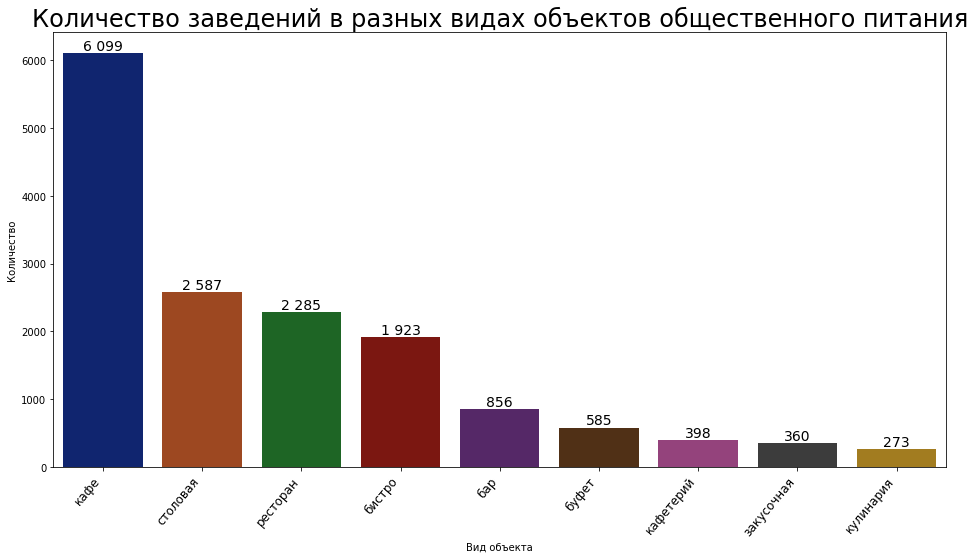

In [35]:
plt.figure(figsize=(16,8))

ax = sns.barplot(x='object_type', y='count', data=rest_data_type) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment ='right', size=12)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ',').replace(',', ' '),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points', size=14)
plt.xlabel('Вид объекта')
plt.ylabel('Количество')
plt.title("Количество заведений в разных видах объектов общественного питания", size=24)
plt.show()

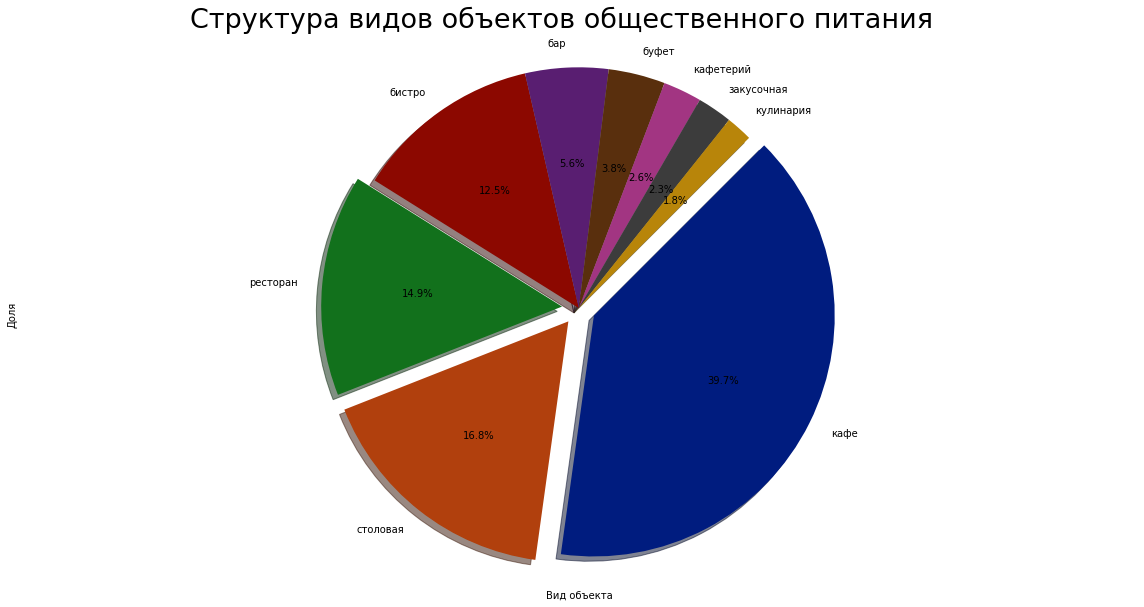

In [36]:
fig, axs = plt.subplots(figsize=(20, 10))
explode = [0.07, 0.07, 0.07, 0, 0, 0, 0, 0, 0]
rest_data_type['count'].plot(
    kind='pie',
    explode=explode,
    startangle=45,
    labels = rest_data_type['object_type'].to_list(),
    #labeldistance = 1.1,
    autopct='%1.1f%%',
    shadow=True, 
    counterclock = False,
    #frame = True,
    #rotatelabels = True
)
axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel('Вид объекта')
plt.ylabel('Доля')
plt.figtext(.5,.9,'Структура видов объектов общественного питания', fontsize=27, ha='center')
plt.show()

### Вывод  
В структуре объектов общественного питания Москвы лидером является тип "кафе" - почти 40% (6099 заведений) - демократично, быстро, доступно. Далее следуют столовые 16,8% (2587 заведений) - палочка-выручалочка рабочих будней - и рестораны 14,9% (2285 заведений) - места для особых случаев. Значительную долю занимают предприятия быстрого обслуживания 12,5% (1923 заведений), соответствующие высокому темпу жизни мегаполиса.

##  Cоотношение сетевых и несетевых заведений по количеству

Исследуем соотношение сетевых и несетевых заведений по количеству.

In [37]:
rest_data_chain = rest_data['chain'].value_counts().reset_index()
rest_data_chain.columns = ['chain', 'count']
rest_data_chain['ratio'] = rest_data_chain['count'] / rest_data_chain['count'].sum()
display(rest_data_chain.style.format({'ratio':"{0:.1%}"}))

,chain,count,ratio
0,не сеть,12398,80.7%
1,сеть,2968,19.3%


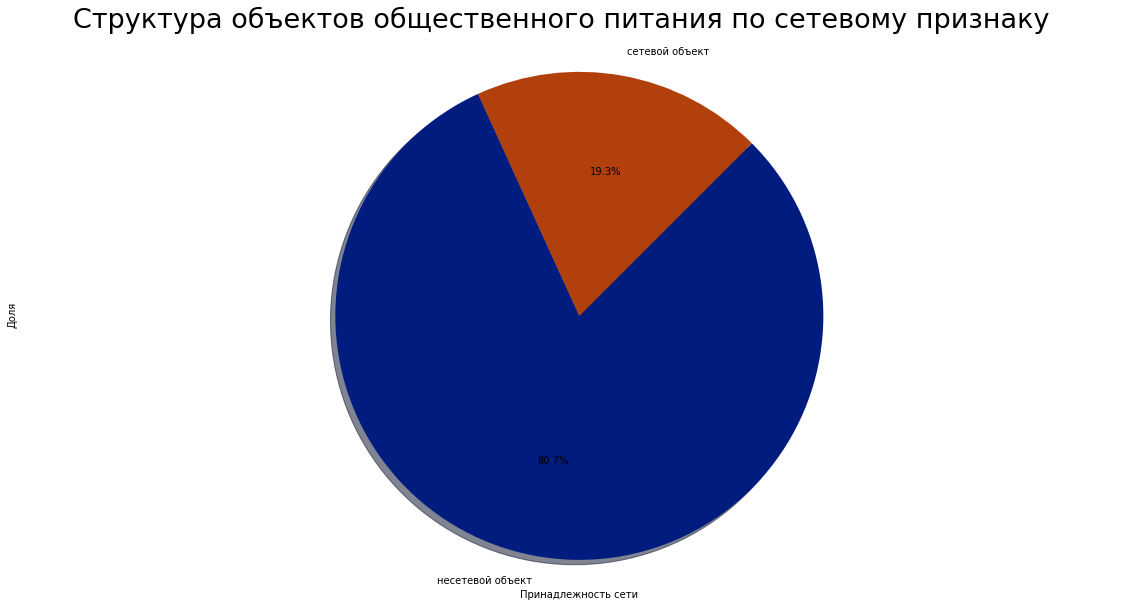

In [38]:
fig, axs = plt.subplots(figsize=(20, 10))
#explode = [0.07, 0.07, 0.07, 0, 0, 0, 0, 0, 0]
rest_data_chain['count'].plot(
    kind='pie',
    #explode=explode,
    startangle=45,
    labels = ['несетевой объект', 'сетевой объект'],
    #labeldistance = 1.1,
    autopct='%1.1f%%',
    shadow=True, 
    counterclock = False,
    #frame = True,
    #rotatelabels = True
)
axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel('Принадлежность сети')
plt.ylabel('Доля')
plt.figtext(.5,.9,'Структура объектов общественного питания по сетевому признаку', fontsize=27, ha='center')
plt.show()

### Вывод  
В структуре объектов общественного питания подавляющее большинство заведений являются не сетевыми - 80,7% (12398 заведений).

## Анализ видов объектов общественного питания по принадлежности к сети

Определим, для какого вида объектов общественного питания характерно сетевое распространение.  

In [39]:
rest_data_type_chain_pivot = rest_data.pivot_table(
    columns=['chain'], 
    index = ['object_type'],
    values='id', 
    aggfunc='count'
).reset_index()
rest_data_type_chain_pivot.columns =  ['object_type','not_chain','chain']
#rest_data_type_chain_pivot.columns
#rest_data_type_chain_pivot

Рассчитаем структуру каждого объекта общественного питания по сетевому признаку.

In [40]:
#rest_data_type_chain = rest_data.pivot_table(
    #index=['object_type','chain'], 
    #values='id', 
    #aggfunc='count'
#).reset_index()
#rest_data_type_chain.columns = ['object_type','chain','count']
#rest_data_type_chain

In [41]:
rest_data_type_chain_pivot['ratio_not_chain'] = rest_data_type_chain_pivot['not_chain'] / (rest_data_type_chain_pivot['chain'] + rest_data_type_chain_pivot['not_chain'])
rest_data_type_chain_pivot['ratio_chain'] = rest_data_type_chain_pivot['chain'] / (rest_data_type_chain_pivot['chain'] + rest_data_type_chain_pivot['not_chain'])
rest_data_type_chain_pivot['ratio_sum'] = rest_data_type_chain_pivot['ratio_not_chain'] + rest_data_type_chain_pivot['ratio_chain']
rest_data_type_chain_pivot = rest_data_type_chain_pivot.sort_values('ratio_chain', ascending = False)
display(rest_data_type_chain_pivot.style.format({'ratio_chain':"{0:.1%}", 'ratio_not_chain':"{0:.1%}", 'ratio_sum':"{0:.1%}"}))

,object_type,not_chain,chain,ratio_not_chain,ratio_chain,ratio_sum
1,бистро,1132,791,58.9%,41.1%,100.0%
6,кулинария,195,78,71.4%,28.6%,100.0%
7,ресторан,1741,544,76.2%,23.8%,100.0%
4,кафе,4703,1396,77.1%,22.9%,100.0%
3,закусочная,304,56,84.4%,15.6%,100.0%
5,кафетерий,346,52,86.9%,13.1%,100.0%
0,бар,819,37,95.7%,4.3%,100.0%
2,буфет,574,11,98.1%,1.9%,100.0%
8,столовая,2584,3,99.9%,0.1%,100.0%


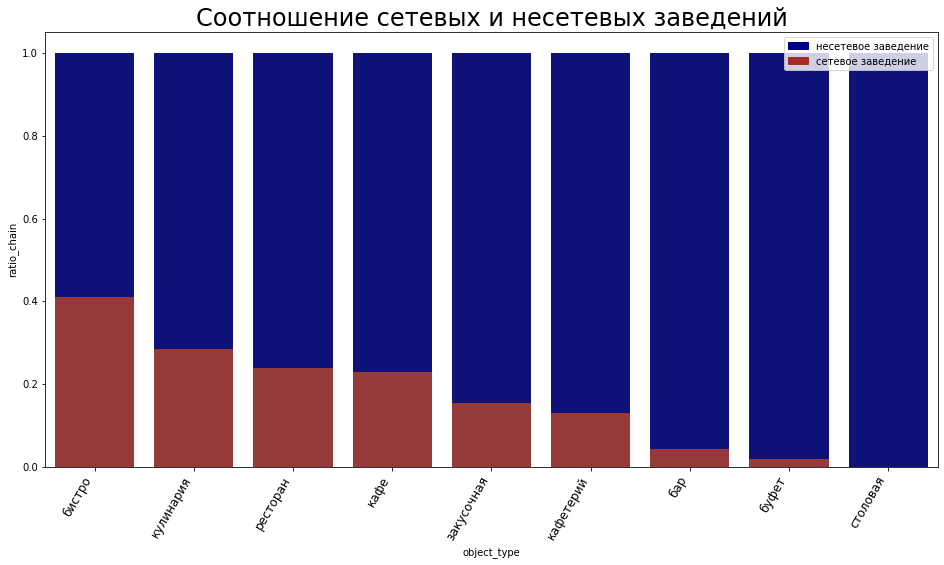

In [42]:
plt.figure(figsize=(16,8))

bar1 = sns.barplot(x="object_type",  y="ratio_sum", data=rest_data_type_chain_pivot, color='darkblue')
bar2 = sns.barplot(x="object_type", y="ratio_chain", data=rest_data_type_chain_pivot,  color='brown')

top_bar = mpatches.Patch(color='darkblue', label='несетевое заведение')
bottom_bar = mpatches.Patch(color='brown', label='сетевое заведение')

plt.legend(handles=[top_bar, bottom_bar])
plt.xticks(rotation=60, horizontalalignment ='right', size=12)
plt.title("Соотношение сетевых и несетевых заведений", size=24)

plt.show()

### Вывод  
Сетевое распространение характерно для предприятий быстрого обслуживания. Доля сетевых заведений в данной группе составляет 41,1%.  
Вторую позицию по степени охвата сетями занимают отделы кулинарии в магазинах - 28,6 %.  
Доля сетей в сегменте рестораны и кафе - 23,8 % и 22,9 % соответственно.  
То есть сети распространены там, где важна высокая скорость обслуживания.

## Анализ сетевых заведений по числу посадочных мест

Проанализируем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?  
Метод решения:
- отобрать все сетевые рестораны;  
- для каждой сети посчитать число заведений;  
- для каждой сети посчитать среднее число посадочных мест в ее ресторанах;
- распределить все сети на 4 группы по признакам много/мало ресторанов, много/мало посадочных мест;
- построить точечную диаграмму (scatterplot) с раскраской по этим группам.

In [43]:
rest_data_chain = rest_data.query('chain == "сеть"')
#rest_data_chain.head()

In [44]:
rest_data_chain = rest_data_chain.groupby('object_name_new').agg({'id': 'count', 'number': 'mean'})
rest_data_chain.head()

,id,number
object_name_new,,
beverly hills diner,1,88.00
bierloga,1,75.00
black white,1,40.00
bocconcino,3,66.67
boobo,1,46.00


In [45]:
#rest_data_chain.query('object_name_new == "кулинарная лавка братьев караваевых"')

In [46]:
rest_data_chain['id'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
        15,  16,  17,  18,  19,  22,  24,  25,  29,  32,  33,  38,  40,
        41,  45,  46,  47,  50,  52,  54,  67,  75,  77,  96,  99, 111,
       159, 173, 183, 187])

Поскольку у нас много заведений с числом заведений, равным 1, то qcut при делении на 2 группы с помощью медианы создает два интервала с неуникальным границами.  
Поэтому для распределения сетевых заведений на группы по количеству мест используем 75% перцентиль вместо медианы.

In [47]:
rest_data_chain['rest_num_group'] = pd.qcut(rest_data_chain['id'], q = [0, 0.75, 1], labels = ['Мало заведений', 'Много заведений'])

Для распределения сетевых заведений на группы по количеству мест используем медиану.

In [48]:
rest_data_chain['seat_num_group'] = pd.qcut(rest_data_chain['number'], q = [0, 0.5, 1], labels = ['Мало мест', 'Много мест'])

In [49]:
rest_data_chain['group'] = rest_data_chain['rest_num_group'].astype(str) + ' - ' + rest_data_chain['seat_num_group'].astype(str)

In [50]:
#rest_data_chain.query('object_name_new == "макдоналдс"')

In [51]:
#rest_data_chain.query('group == "Много заведений - Много мест"')

In [52]:
rest_data_chain.reset_index().groupby('group').agg(
    {'object_name_new':'nunique', 'id':'median', 'number':'median'}
).rename(columns={'object_name_new': 'Число сетей',
                 'id':'Медианное число заведений',
                 'number': 'Медианное число посадочных мест'})

,Число сетей,Медианное число заведений,Медианное число посадочных мест
group,,,
Мало заведений - Мало мест,111,1.00,17.50
Мало заведений - Много мест,124,2.00,80.00
Много заведений - Мало мест,44,15.50,22.18
Много заведений - Много мест,31,18.00,87.02


<function matplotlib.pyplot.show(*args, **kw)>

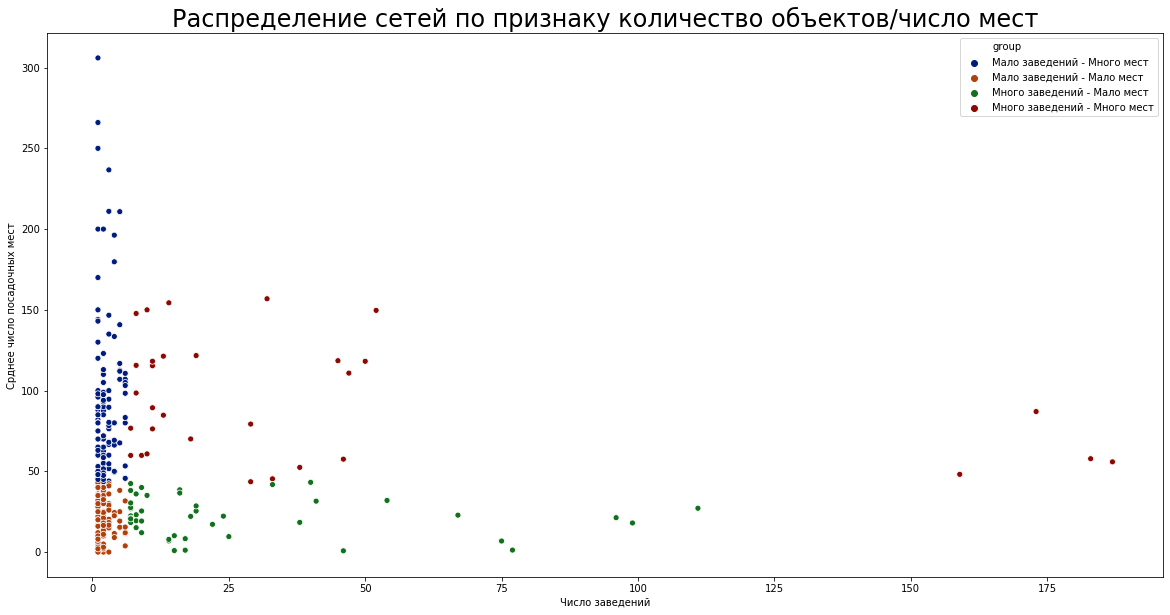

In [53]:
plt.figure(figsize=(20, 10))

sns.scatterplot(data = rest_data_chain, x = 'id', y = 'number', hue = 'group')

plt.xlabel('Число заведений')
plt.ylabel('Срднее число посадочных мест')
plt.title("Распределение сетей по признаку количество объектов/число мест", size=24)
plt.show


### Вывод  
Для сетевых заведений лидируют два типа соотношения количество объектов сети / количество посадочных мест:  
1 - Мало заведений - Много мест;  
2 - Мало заведений - Мало мест.  
Сетей с большим количеством объектов немного. 

## Анализ среднего количества посадочных мест

Проанализируем количество посадочных мест для каждого вида объекта общественного питания.

In [54]:
rest_data.head()

,id,object_name,chain,object_type,address,number,object_name_corr,object_name_new
0,151635,СМЕТАНА,не сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,сметана
1,77874,Родник,не сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,родник
2,24309,Кафе «Академия»,не сеть,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия,кафе академия
3,21894,ПИЦЦЕТОРИЯ,сеть,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,пиццетория
4,119365,Кафе «Вишневая метель»,не сеть,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель,кафе вишневая метель


In [55]:
rest_data_number = rest_data.pivot_table(
    index = ['object_type'],
    values='number', 
    aggfunc='mean'
).reset_index().sort_values('number', ascending = False)
rest_data_number.columns =  ['object_type','number_mean']
#rest_data_number.columns
rest_data_number

,object_type,number_mean
8,столовая,130.25
7,ресторан,96.83
2,буфет,51.13
0,бар,43.49
4,кафе,39.72
1,бистро,20.55
5,кафетерий,9.12
3,закусочная,7.61
6,кулинария,5.59


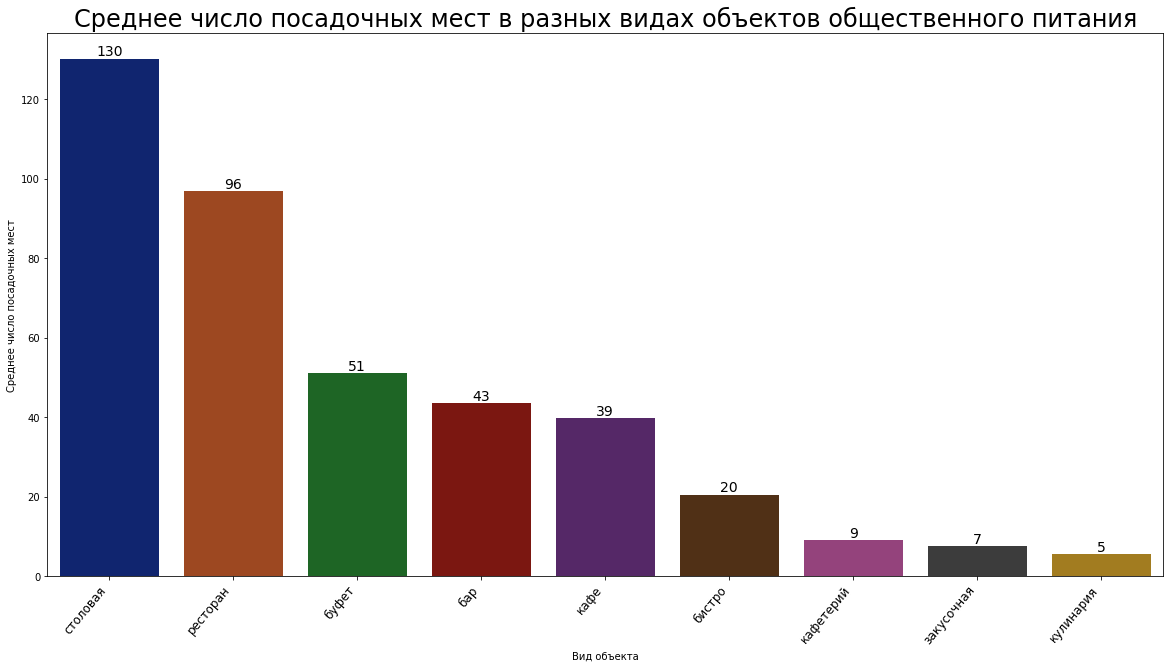

In [56]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(x='object_type', y='number_mean', data=rest_data_number) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment ='right', size=12)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ',').replace(',', ' '),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points', size=14)
plt.xlabel('Вид объекта')
plt.ylabel('Среднее число посадочных мест')
plt.title("Среднее число посадочных мест в разных видах объектов общественного питания", size=24)
plt.show()

### Вывод
Наибольшее среднее число посадочных мест характерно для столовых - 130. Рестораны в среднем обеспечивают  96 посадочных мест, буфеты - 56.

## Анализ размещения объектов общественного питания

In [57]:
street_types = ['улица', 'ул', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека', 'село']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(street_types))
rest_data['street'] = rest_data['address'].str.extract(str_pat, flags=re.I)
rest_data.head()


,id,object_name,chain,object_type,address,number,object_name_corr,object_name_new,street
0,151635,СМЕТАНА,не сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,сметана,улица Егора Абакумова
1,77874,Родник,не сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,родник,улица Талалихина
2,24309,Кафе «Академия»,не сеть,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия,кафе академия,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,сеть,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,пиццетория,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,не сеть,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель,кафе вишневая метель,Абрамцевская улица


Определим топ-10 улиц по количеству объектов общественного питания.


In [58]:
top_10_streets = (rest_data.groupby('street')
                  .agg({'id':'count'})
                  .sort_values(by = 'id', ascending = False).head(10)
                  .reset_index()
                  )
top_10_streets.rename(
    columns={
        'id': 'rest_number'
    },
    inplace=True
)   
top_10_streets

,street,rest_number
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


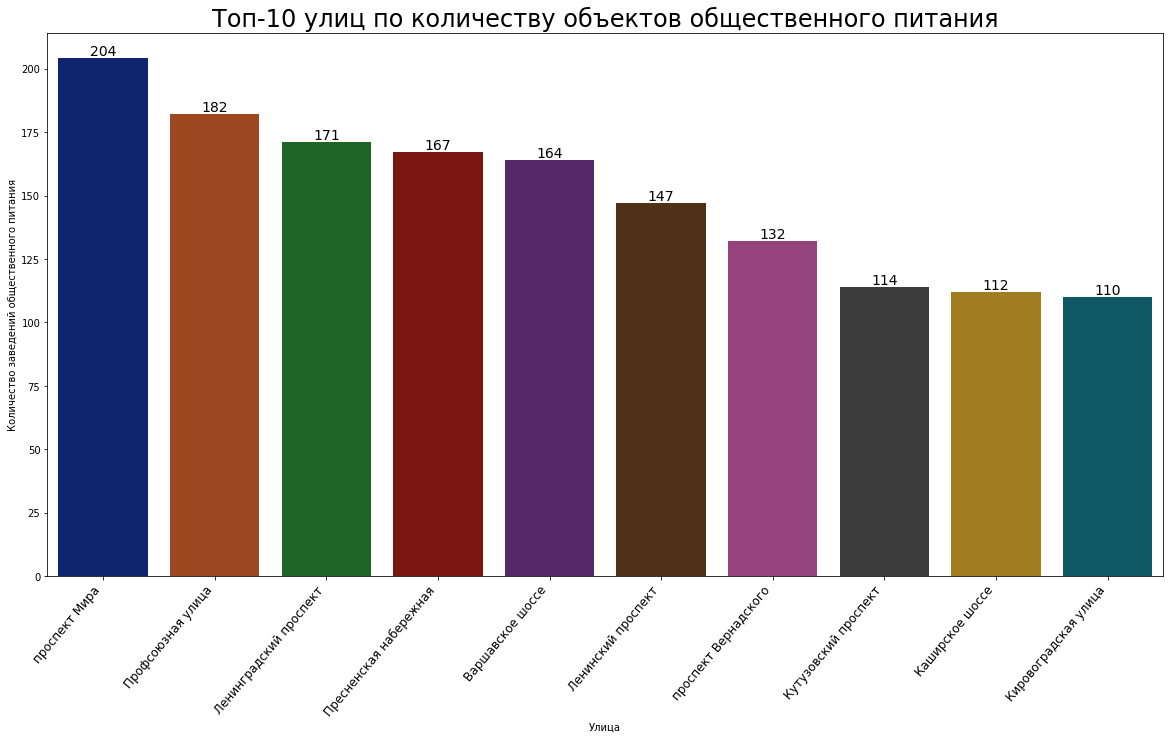

In [59]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(x='street', y='rest_number', data=top_10_streets) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment ='right', size=12)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ',').replace(',', ' '),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points', size=14)
plt.xlabel('Улица')
plt.ylabel('Количество заведений общественного питания')
plt.title("Топ-10 улиц по количеству объектов общественного питания", size=24)
plt.show()

Результат ожидаемый - наибольшее количество заведений общественного питания расположено на крупных протяженных городских улицах.

In [60]:
from io import BytesIO
import requests
spreadsheet_id = '1ze8KNNO0PJhkFt7ixod0XtPHP1gS9z8W3XbejpQIodY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [61]:
top_10_streets_area = top_10_streets.merge(streets, left_on='street', right_on='streetname')
top_10_streets_area = top_10_streets_area[['street', 'okrug', 'area']]
top_10_streets_area

,street,okrug,area
0,проспект Мира,СВАО,Алексеевский район
1,проспект Мира,СВАО,Ярославский Район
2,проспект Мира,СВАО,Район Марьина роща
3,проспект Мира,СВАО,Останкинский район
4,проспект Мира,СВАО,Район Ростокино
5,проспект Мира,СВАО,Район Свиблово
6,проспект Мира,ЦАО,Мещанский район
7,Профсоюзная улица,ЮЗАО,Академический район
8,Профсоюзная улица,ЮЗАО,Район Черемушки
9,Профсоюзная улица,ЮЗАО,Район Ясенево


In [62]:
top_10_streets_area.groupby(['okrug','area']).agg({'street' : 'count'}).reset_index().rename({'street':'number_street'})


,okrug,area,street
0,ЗАО,Район Дорогомилово,1
1,ЗАО,Район Проспект Вернадского,2
2,ЗАО,Район Раменки,1
3,ЗАО,Район Тропарево-Никулино,2
4,ЗАО,Район Фили-Давыдково,1
5,САО,Район Аэропорт,1
6,САО,Район Беговой,1
7,САО,Район Сокол,1
8,САО,Хорошевский район,1
9,СВАО,Алексеевский район,1


Найдем число улиц с одним объектом общественного питания.

In [63]:
streets_1_rest = (rest_data.groupby('street')
                  .agg({'id':'count'})
                  .reset_index()
                  )
streets_1_rest.rename(
    columns={
        'id': 'rest_number'
    },
    inplace=True
)   
streets_1_rest = streets_1_rest.query('rest_number == 1')
len(streets_1_rest)

553

В Москве на 553 улицах располагается 1 объект общественного питания. Посмотрим, в каких районах Москвы находятся эти улицы.

In [64]:
streets_1_rest.head()

,street,rest_number
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1


In [65]:
streets_1_rest = streets_1_rest.merge(streets, left_on='street', right_on='streetname')
streets_1_rest.head()

,street,rest_number,streetname,areaid,okrug,area
0,1-й Балтийский переулок,1,1-й Балтийский переулок,54,САО,Район Аэропорт
1,1-й Басманный переулок,1,1-й Басманный переулок,13,ЦАО,Басманный район
2,1-й Басманный переулок,1,1-й Басманный переулок,15,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,1-й Ботанический проезд,82,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,1-й Вешняковский проезд,120,ЮВАО,Рязанский район


In [66]:
streets_1_rest = streets_1_rest[['street', 'okrug', 'area']]
streets_1_rest = streets_1_rest.groupby(['okrug','area']).agg({'street' : 'count'}).reset_index()
streets_1_rest = streets_1_rest.rename(columns = {'street':'street_number'})

In [67]:
streets_1_rest.sort_values('street_number', ascending = False)

,okrug,area,street_number
71,ЦАО,Таганский район,27
69,ЦАО,Район Хамовники,26
63,ЦАО,Басманный район,25
72,ЦАО,Тверской район,20
66,ЦАО,Пресненский район,19
48,СВАО,Район Марьина роща,18
65,ЦАО,Мещанский район,17
67,ЦАО,Район Арбат,17
68,ЦАО,Район Замоскворечье,14
84,ЮВАО,Район Лефортово,12


### Вывод  
Наибольшее количество объектов общественного питания расположено на протяженных городских улицах. В плотно населенных районах с крупными торговыми центрами (например, Columbus в Чертаново Южное), деловыми центрами (например, Москва-Сити в Пресненском районе), спортивными объектами (например, стадион ВЭБ-Арена в Хорошевском районе).  
В Москве на 553 улицах располагается 1 объект общественного питания. Много таких улиц находится в районах центрального административного округа, что связано с высокими арендными ставками и особенностями исторической планировки (небольшая протяженность улиц, небольшие переулки).

## Анализ количества посадочных мест для улиц с большим количеством объектов общественного питания

Проанализируем распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 

In [68]:
top_10_streets_list = list(top_10_streets['street'])
top_10_streets_list

['проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Пресненская набережная',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица']

In [69]:
rest_data.head()

,id,object_name,chain,object_type,address,number,object_name_corr,object_name_new,street
0,151635,СМЕТАНА,не сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,сметана,улица Егора Абакумова
1,77874,Родник,не сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,родник,улица Талалихина
2,24309,Кафе «Академия»,не сеть,кафе,"город Москва, Абельмановская улица, дом 6",95,кафе академия,кафе академия,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,сеть,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,пиццетория,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,не сеть,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,кафе вишневая метель,кафе вишневая метель,Абрамцевская улица


In [70]:
rest_data_number_street = (rest_data
                           .query('street in @top_10_streets_list')
                           .groupby('street')['number'].agg('sum')
                           .reset_index()
                           .sort_values('number', ascending = False)
) 
rest_data_number_street

,street,number
9,проспект Мира,12790
3,Кутузовский проспект,9697
5,Ленинский проспект,9330
4,Ленинградский проспект,9010
8,проспект Вернадского,8840
0,Варшавское шоссе,8606
7,Профсоюзная улица,8447
6,Пресненская набережная,7656
2,Кировоградская улица,6577
1,Каширское шоссе,6171


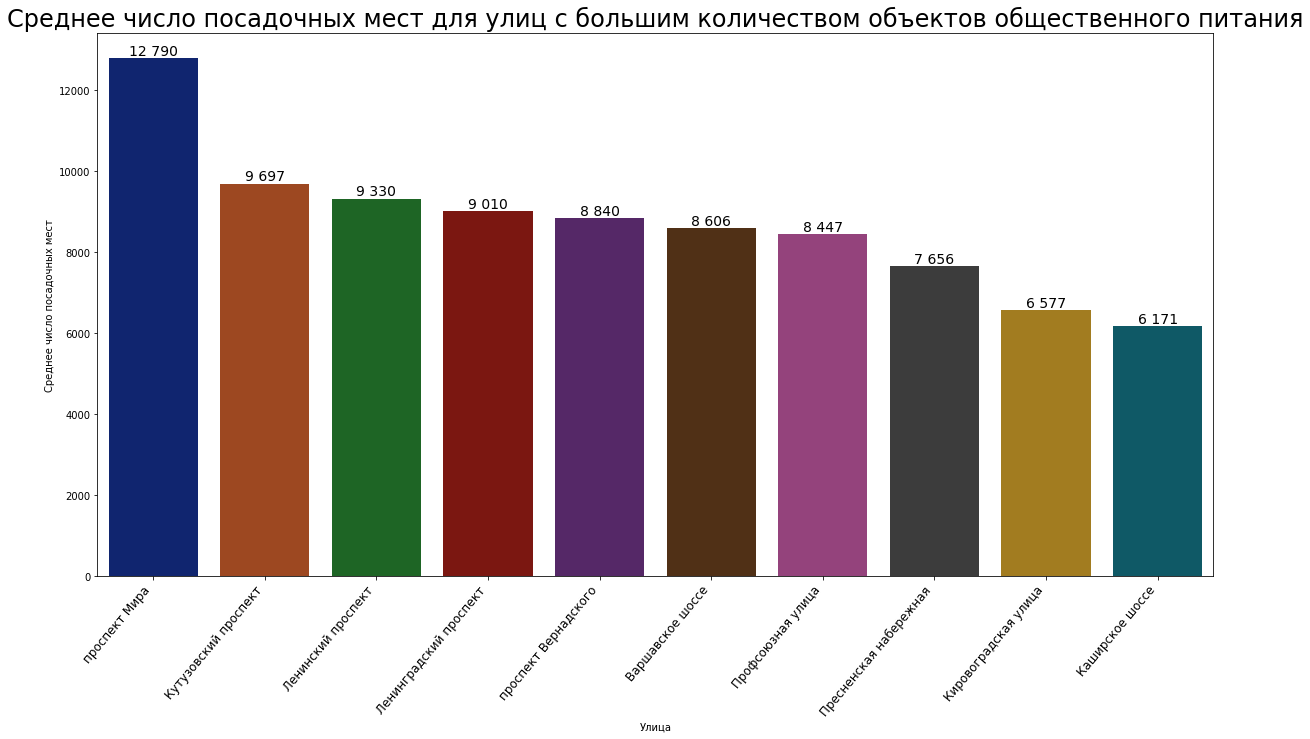

In [71]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(x='street', y='number', data=rest_data_number_street) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment ='right', size=12)
for p in ax.patches:
    ax.annotate(format(int(p.get_height()), ',').replace(',', ' '),
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 7), 
                   textcoords = 'offset points', size=14)
plt.xlabel('Улица')
plt.ylabel('Среднее число посадочных мест')
plt.title("Среднее число посадочных мест для улиц с большим количеством объектов общественного питания", size=24)
plt.show()

### Вывод
Проспект Мира держит лидирующие позиции как по количеству заведений (204), так и по числу посадочных мест (12790 мест). А вот Кутузовский проспект по количеству заведений находился в последней трети топ-10, а вот по числу посадочных мест вышел в лидеры (9697 мест). Каширское шоссе и Кировоградская улица сохраняют свой рейтинг - замыкают топ-10 и по обоим показателям.

## Общий вывод  


**Вид объекта**  
2 подхода к выбору вида объекта:
1. Самый популярный вид объектов общественного питания в Москве - кафе (40% рынка). Это достаточно демократичный формат: подходит разной аудитории - по доходу, по возрасту, по взглядам и иным признакам. Можно открыть свое кафе в этом формате, роботы-официанты будут привлекательной "фишкой".  
2. С другой стороны, роботы-официанты за счет высокой скорости обслуживания и стандартизации процессов позволяют использовать формат предприятий быстрого обслуживания. Данный формат менее распространен - 12,5% рынка Москвы. Вместе с тем этом сегменте придется конкурировать с сильными мировыми брендами  - Макдоналдс, KFC, Бургер Кинг - а также популярными сетями итальянского фастфуда - Папа Джонс, Додо пицца и др. В связи с этим следует обдумать меню, придать ему уникальности.  

При выборе концепции предприятий быстрого обслуживания лучше ориентироваться на сетевой характер заведений. Он распространен для данного сегмента 41% от общего числа сетевых заведений. Здесь необходимо проработать вопрос с франшизой.  

**Количество посадочных мест**  
1. Характерное количество посадочных мест для формата кафе - 39. Это будет ориентиром для нас.  
2. При выборе сетевого формата за основу необходимо взять подход "мало заведений - много мест", ориентиры по количеству заведений - 2, по числу мест - 80.  

**Район расположения**
1. Формат кафе достаточно универсален с точки зрения размещения. Можно сделать акцент на скорости роботообслуживания и разместить кафе в районах (улицах) с высоким трафиком - подойдет крупный торговый или деловой центр. Можно сделать акцент на уникальности роботообслуживания и сделать кафе популярным "туристическим" местом. В этой ситуации размещать лучше в районах центрального администартивного округа, где сосредоточены основные туристические маршруты.  
2. Предприятия быстрого обслуживания с большим количеством посадочных мест лучше размещать в районах (улицах) с высоким трафиком.  

Формат робото-кафе останется локальным и ограничится рынком Москвы, формат сетевого бистро можно тиражировать не только в Москве, но и регионах, в том числе за счет франшизы.

Презентация:  
https://drive.google.com/file/d/1YWTCtvxJYkjiJO7CAOhHFxBustr3FYr4/view?usp=sharing